In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('Activation Function').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'int'})
dataset1 = dataset1.astype({'Output':'int'})

In [ ]:
dataset1.head()

,Input,Output
0,0,1
1,1,6
2,2,11
3,3,16
4,4,21


In [ ]:
dataset1.describe()

,Input,Output
count,10.00000,10.000000
mean,4.50000,46.000000
std,3.02765,38.729833
min,0.00000,1.000000
25%,2.25000,12.250000
50%,4.50000,41.000000
75%,6.75000,78.500000
max,9.00000,101.000000


In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Input   10 non-null     int64
 1   Output  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [ ]:
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
model=Sequential([Dense(units=4,activation='relu',input_shape=[1]),
                  Dense(units=6,activation='relu'),
                  Dense(units=4,activation='relu'),
                  Dense(units=1)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
model.fit(X_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step - loss: 2036.1470
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2035.2191
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2034.5270
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2033.7744
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2033.0856
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2032.5057
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2031.9912
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2031.5436
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2031.1152
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2030.7157
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2030.3444
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2029.9811
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2029.6232
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2029.2828
Epoch 15/2000
1/1 ━━━━━━━━━━

In [ ]:
loss=pd.DataFrame(model.history.history)

<Axes: >

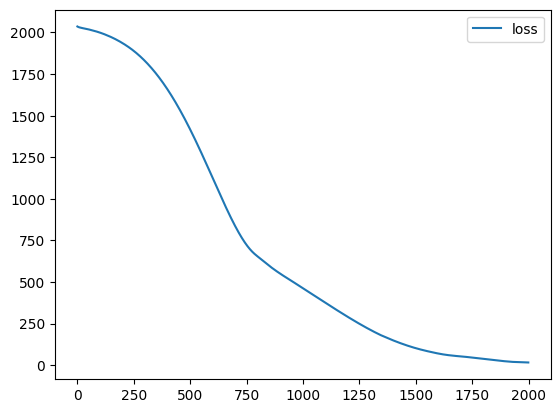

In [ ]:
loss.plot()

In [ ]:
xtestscaled=Scaler.transform(X_test)

In [ ]:
model.evaluate(xtestscaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 5348.9277


5348.927734375

In [ ]:
p=[[5]]

In [ ]:
pscale= Scaler.transform(p)

In [ ]:
model.predict(pscale)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[2.0085306]], dtype=float32)